<a href="https://colab.research.google.com/github/kapilrahtor/Speech_Processing/blob/main/SP_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!pip install --upgrade librosa

In [ ]:
import os

# Set Kaggle API credentials path
os.environ['KAGGLE_CONFIG_DIR'] = '/root/.kaggle/'

# Download the dataset
!kaggle datasets download -d iamhungundji/dysarthria-detection

# Unzip the downloaded file
!unzip -q '*.zip' -d data

 93% 144M/155M [00:00<00:00, 211MB/s]
100% 155M/155M [00:00<00:00, 202MB/s]


In [ ]:
import tensorflow as tf
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
import IPython.display as ipd

In [ ]:
df = pd.read_csv('/content/data/torgo_data/data.csv')

In [ ]:
df

,is_dysarthria,gender,filename
0,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session2...
1,non_dysarthria,female,torgo_data/non_dysarthria_female/FC02_Session3...
2,non_dysarthria,female,torgo_data/non_dysarthria_female/FC02_Session3...
3,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session2...
4,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session1...
...,...,...,...
1995,dysarthria,male,torgo_data/dysarthria_male/M03_Session2_0144.wav
1996,dysarthria,male,torgo_data/dysarthria_male/M02_Session1_0005.wav
1997,dysarthria,male,torgo_data/dysarthria_male/M03_Session2_0040.wav
1998,dysarthria,male,torgo_data/dysarthria_male/M03_Session2_0260.wav


In [ ]:
def create_waveplot(data, sr, i):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {}'.format(i), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_mel_Spectogram(data, sr, i):
    plt.figure(figsize=(10, 3))
    plt.title('Mel Spectrogram of audio {} emotion'.format(i), size=15)
    mel_spec = librosa.feature.melspectrogram(y=data, sr=sr)
    librosa.display.specshow(mel_spec, sr=sr, x_axis='time')
    plt.show()


def create_Spectogram(data, sr, i): # have to check which is spect on log

    plt.figure(figsize=(10, 3))
    plt.title('Spectrogram of audio {} '.format(i), size=15)
    X = librosa.stft(data)

    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb,sr = sr, x_axis="time",y_axis = "log")
    plt.show()


def create_Zero_crossing_rate(data, sr, i):

    zero_crossings = librosa.zero_crossings(data)
    print("Sum of zero crossing ", zero_crossings.sum())
    plt.figure(figsize=(10, 3))
    plt.title('Zero Crossing Rate of audio {} '.format(i), size=15)
    zcrs = librosa.feature.zero_crossing_rate(data)
    plt.plot(zcrs[0])
    plt.show()

def create_mfcc(data, sr, i):

    plt.figure(figsize=(10, 3))
    plt.title('MFCC of audio {} '.format(i), size=15)
    mfccs = librosa.feature.mfcc(y=data, sr=sr)
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.show()

def create_Spectral_rolloff(data, sr, i):

    plt.figure(figsize=(10, 3))
    plt.title('Spectral Rolloff of audio {} '.format(i), size=15)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=data, sr=sr)[0]
    frames = range(len(spectral_rolloff))
    t = librosa.frames_to_time(frames)
    librosa.display.waveshow(data, sr=sr, alpha=0.4)
    plt.plot(t, spectral_rolloff, color='r')
    plt.show()


def create_Spectral_centroid(data, sr, i):

    plt.figure(figsize=(10, 3))
    plt.title('Spectral Centroids of audio {} '.format(i), size=15)
    spectral_centroids = librosa.feature.spectral_centroid(y=data , sr=sr)
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    librosa.display.waveshow(data, sr=sr, alpha=0.4)
    plt.plot(t, spectral_centroids, color='r')
    plt.show()

In [ ]:
def get_the_feature_plot(x,data, sr, info):
  create_waveplot(data, sampling_rate, info)
  create_Spectogram(data, sampling_rate, info)
  create_Zero_crossing_rate(data, sampling_rate, info)
  create_Spectral_centroid(data,sampling_rate, info)
  create_Spectral_rolloff(data, sampling_rate, info)
  create_mfcc(data, sampling_rate, info)
  create_mel_Spectogram(data, sampling_rate, info)
  Audio(x)


#dysarthric male

In [ ]:
from IPython.display import Audio

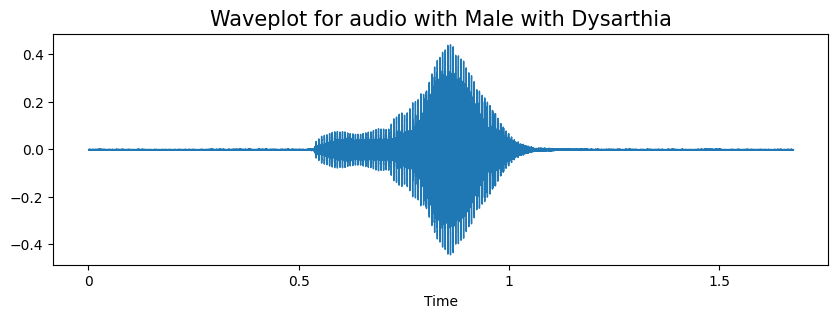

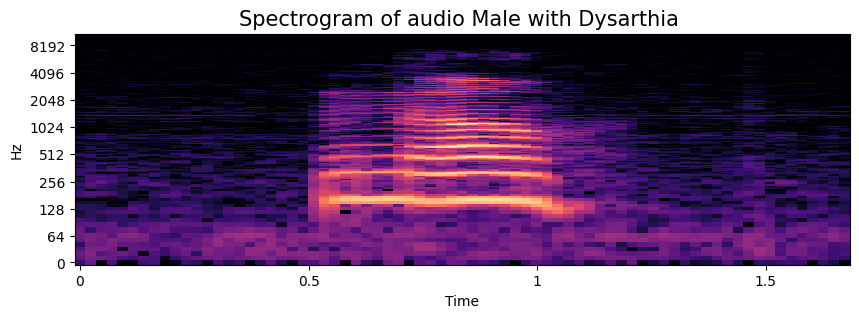

Sum of zero crossing  2876


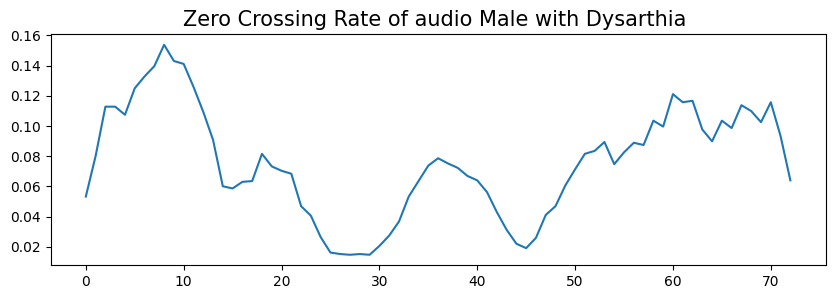

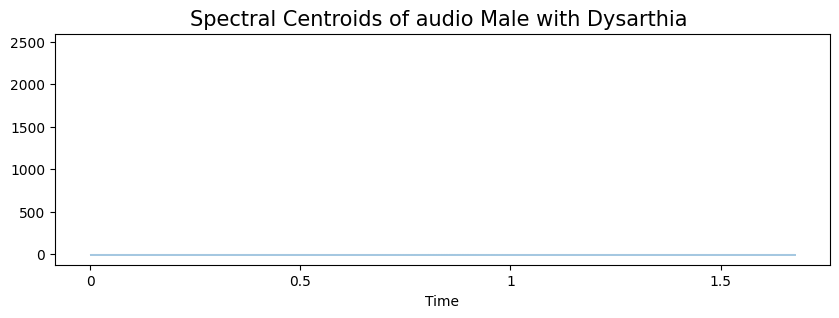

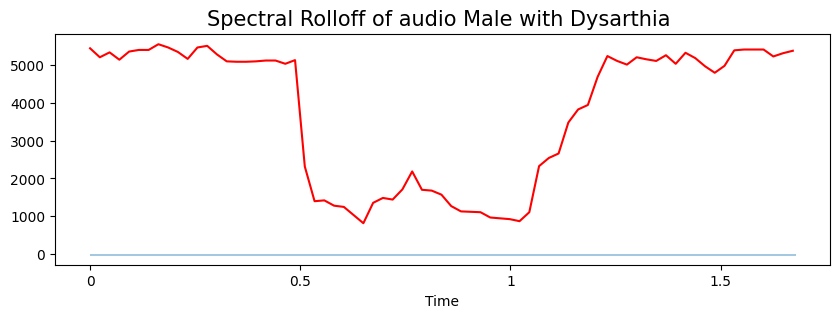

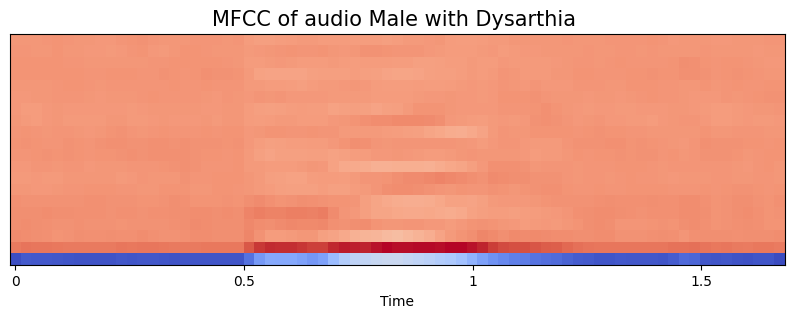

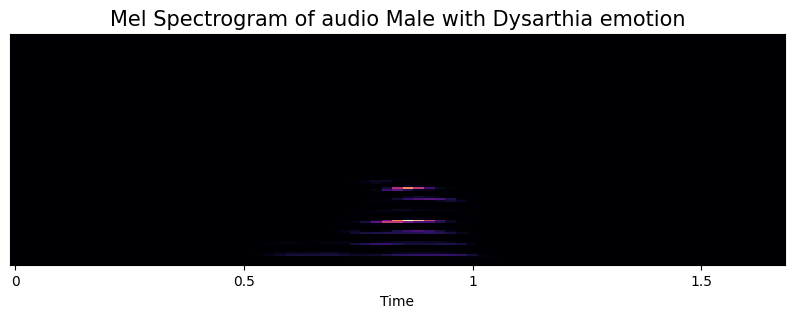

In [ ]:
dysarthricMALE = df[(df['gender']=='male') & (df['is_dysarthria']=='dysarthria') ]
DM = dysarthricMALE.sample()
x= '/content/data/'+DM.iloc[0].filename
info= "Male with Dysarthia"
data, sampling_rate = librosa.load(x)
get_the_feature_plot(x,data, sampling_rate, info)
Audio(x)

#Female with Dysarthia

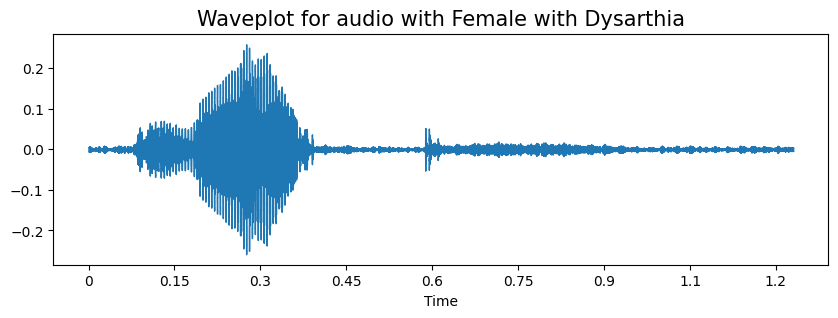

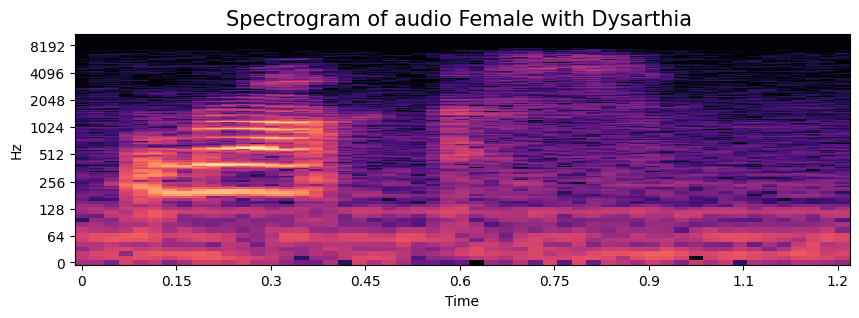

Sum of zero crossing  2614


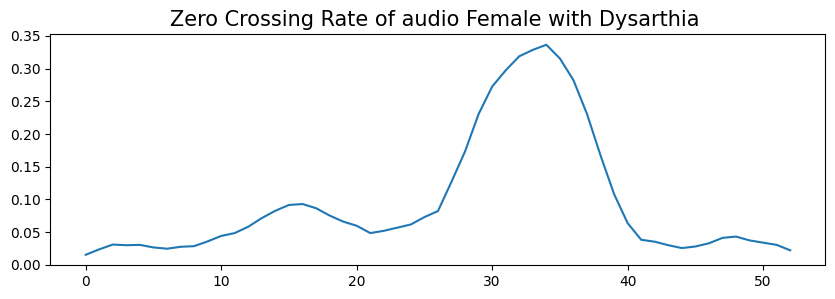

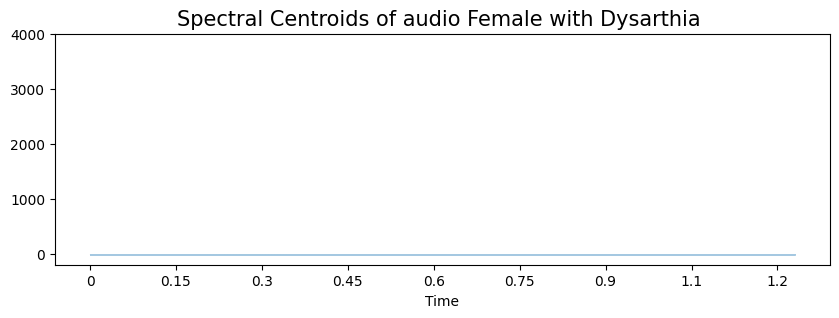

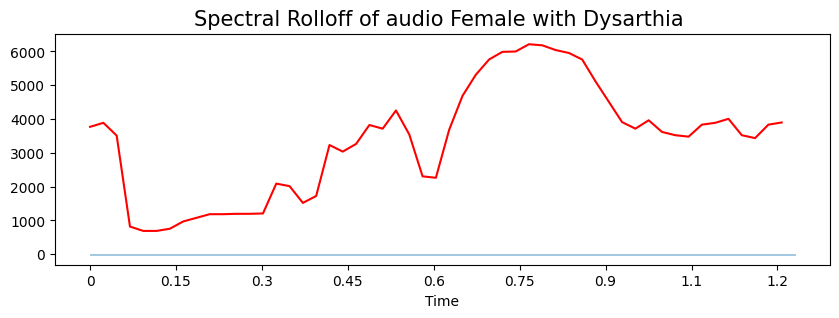

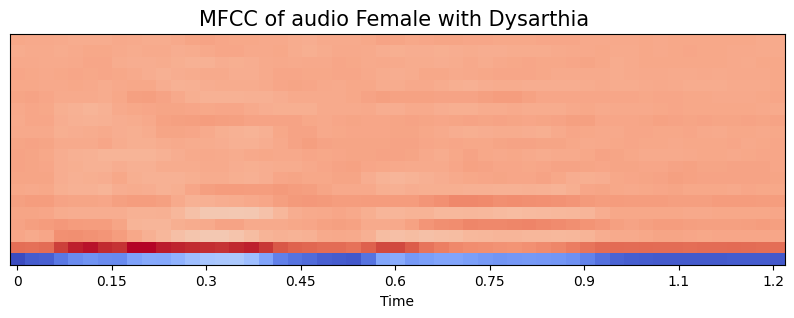

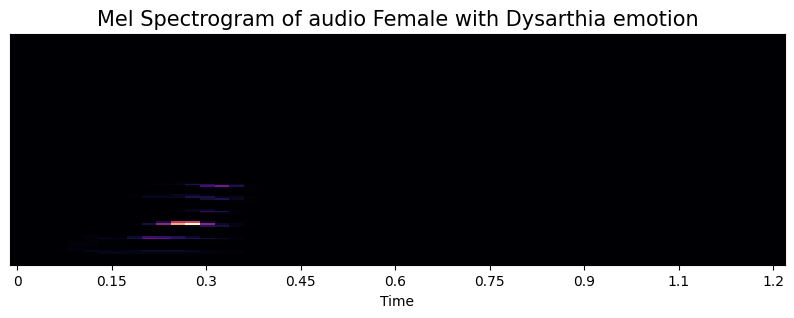

In [ ]:
dysarthricFemale = df[(df['gender']=='female') & (df['is_dysarthria']=='dysarthria')]

DF = dysarthricFemale.sample()
x= '/content/data/'+DF.iloc[0].filename

info= "Female with Dysarthia"
data, sampling_rate = librosa.load(x)
get_the_feature_plot(x,data, sampling_rate, info)
Audio(x)


# Male not with Dysarthia

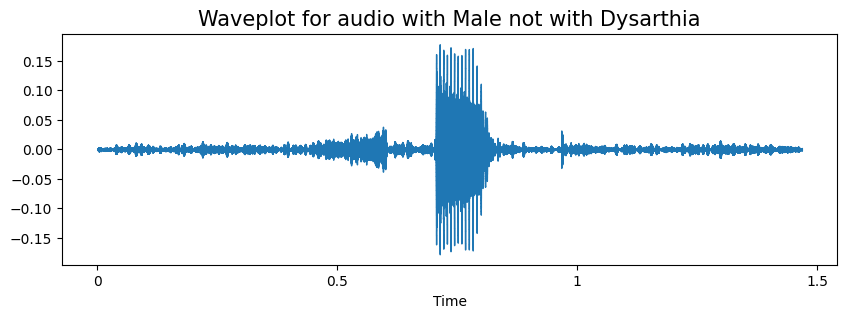

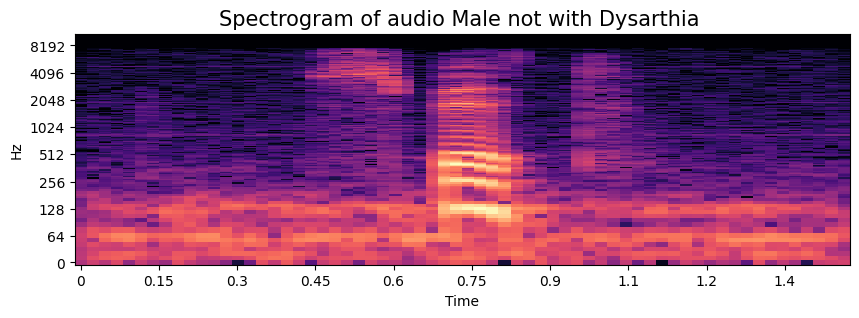

Sum of zero crossing  1846


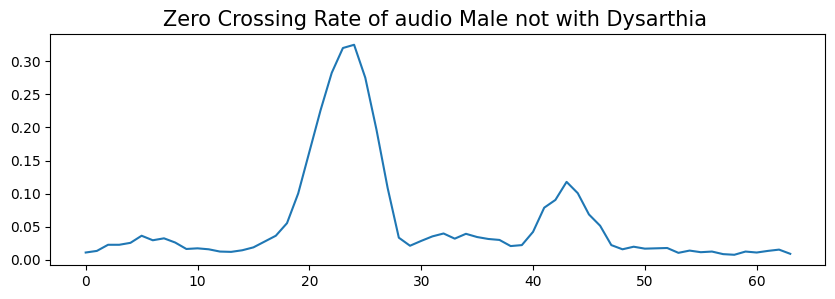

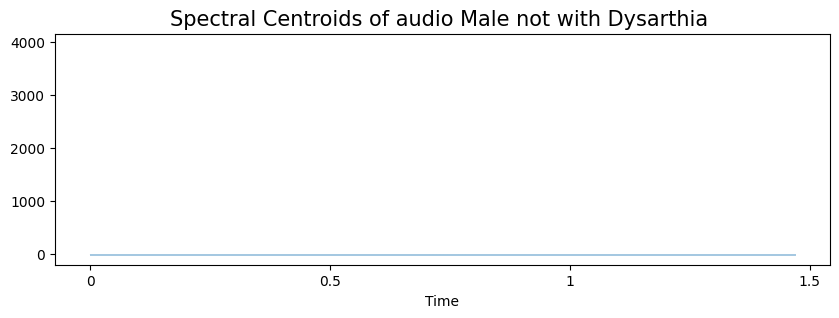

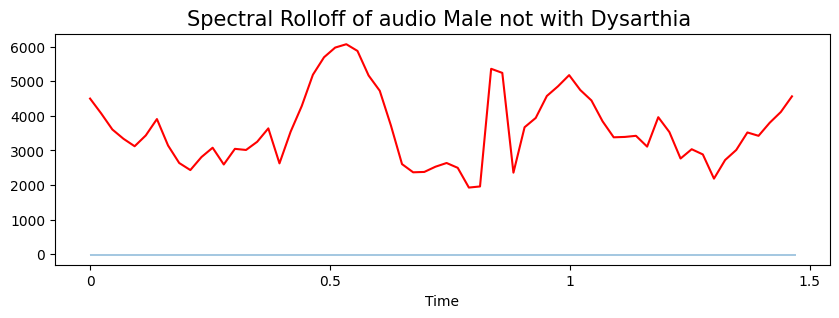

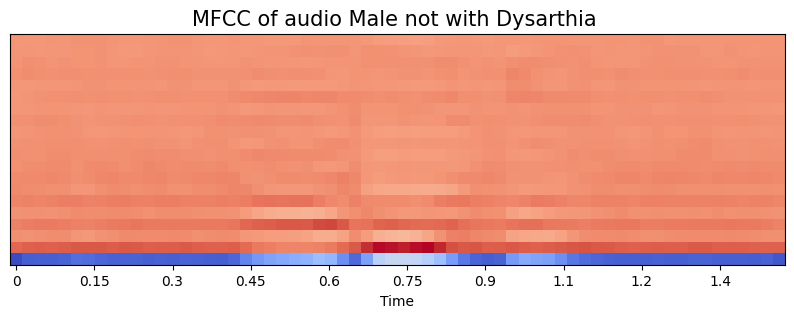

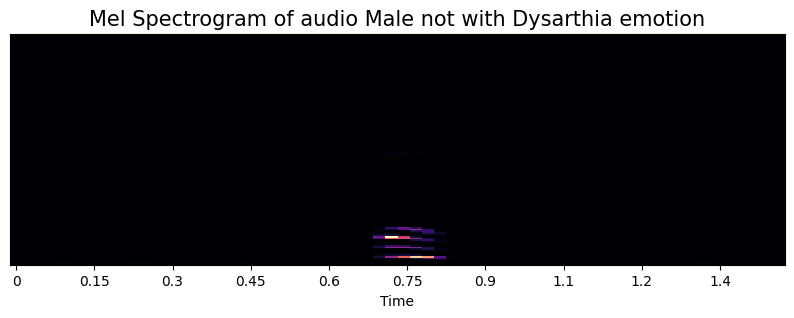

In [ ]:
non_dysarthricMale  = df[(df['gender']=='male') & (df['is_dysarthria']=='non_dysarthria')]

DF = non_dysarthricMale.sample()
x= '/content/data/'+DF.iloc[0].filename

info= "Male not with Dysarthia"
data, sampling_rate = librosa.load(x)
get_the_feature_plot(x,data, sampling_rate, info)
Audio(x)

#Female with Non-Dysarthia


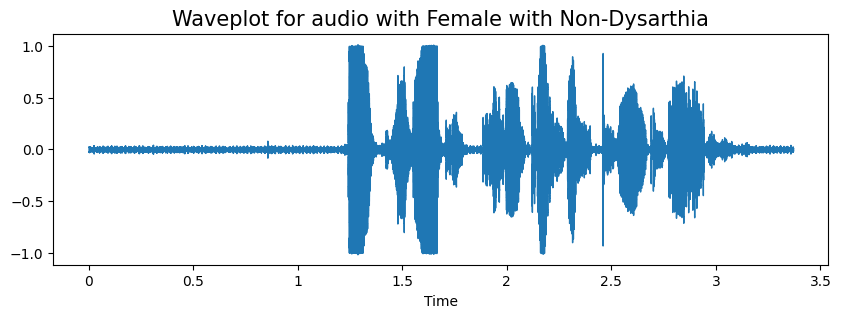

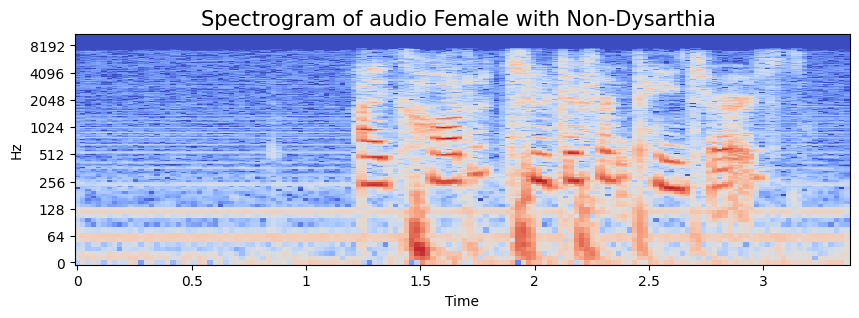

Sum of zero crossing  7455


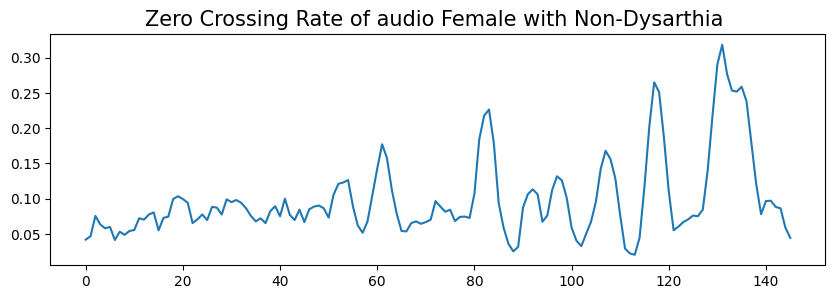

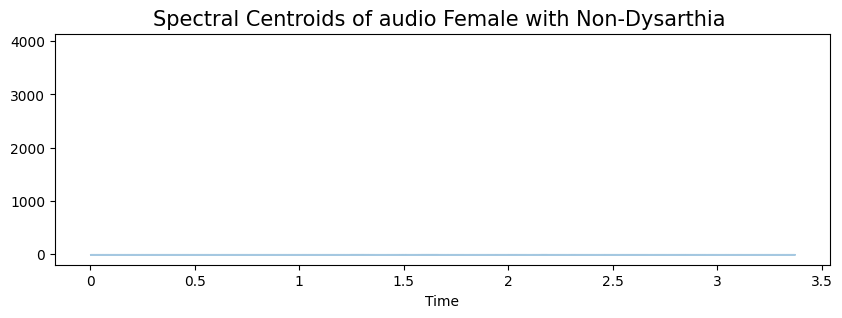

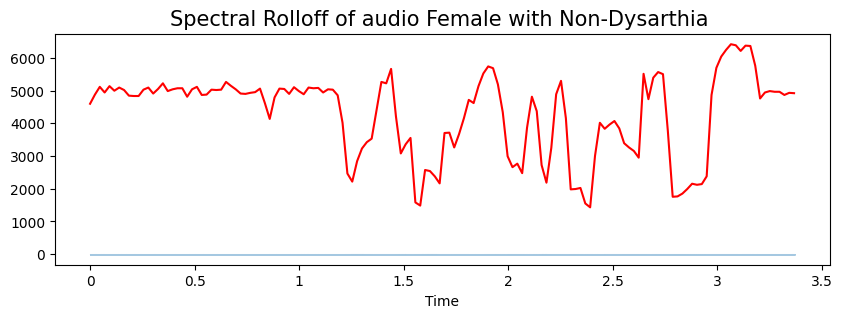

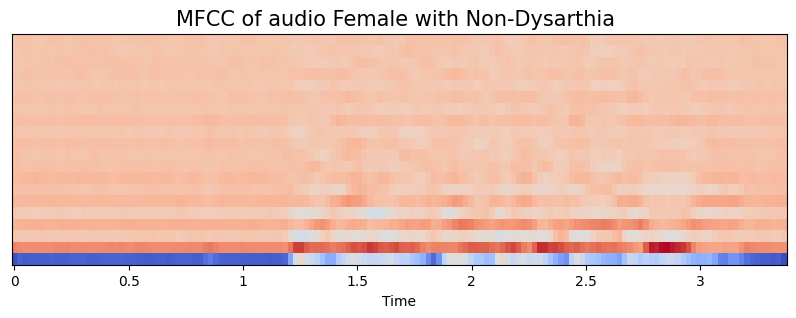

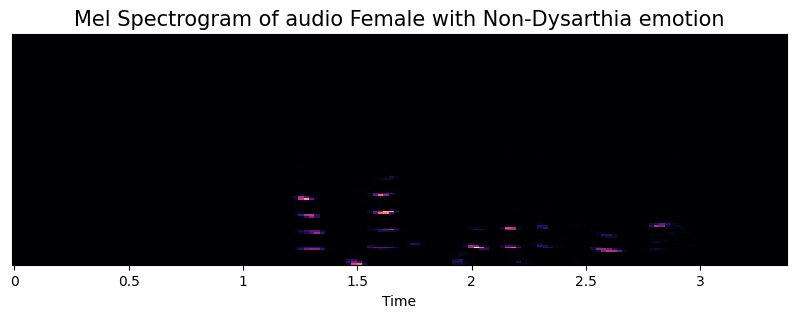

In [ ]:
non_dysarthricFemale = df[(df['gender']=='female') & (df['is_dysarthria']=='non_dysarthria')]

DF = non_dysarthricFemale.sample()
x= '/content/data/'+DF.iloc[0].filename

info= "Female with Non-Dysarthia"
data, sampling_rate = librosa.load(x)
get_the_feature_plot(x,data, sampling_rate, info)
Audio(x)


#Define a function to create 256 MFCC features for any given audio file.

In [ ]:
def mfcc_features_extract(x):

    features_mfcc = []
    try:
        x , sr = librosa.load(x)
        features_mfcc = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=256)
        features_mfcc = np.mean(features_mfcc.T,axis=0)
    except:
        print('Error reading audio')
    return features_mfcc

In [ ]:
x , sr = librosa.load('/content/data/torgo_data/dysarthria_male/M01_Session1_0005.wav')

In [ ]:
features_mfcc = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128)
features_mfcc.shape


(128, 521)

In [ ]:
features_mfcc = np.mean(features_mfcc.T,axis=0)
features_mfcc.shape

(128,)

In [ ]:
N = ('/content/data/'+df['filename']).apply(lambda a: mfcc_features_extract(a))

<ipython-input-199-cd89745564b9>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  x , sr = librosa.load(x)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error reading audio


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=209
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=583
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=581
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=185
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=946
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=214
  warnings.warn(


In [ ]:
N

0       [-221.78827, 101.25923, -16.548132, 38.492065,...
1       [-299.52008, 109.872574, -17.09727, 38.85497, ...
2       [-302.95004, 112.04848, -23.679882, 44.887413,...
3       [-210.8616, 116.504486, -35.046494, 37.670425,...
4       [-280.2272, 104.505035, -17.209877, 45.064884,...
                              ...                        
1995    [-304.232, 115.35931, -0.79474634, 26.543352, ...
1996    [-457.82214, 110.0878, 22.221985, -0.056086063...
1997    [-371.54688, 116.84691, 5.667272, 22.488144, 8...
1998    [-302.5007, 112.51119, -4.5065403, 32.498363, ...
1999    [-385.8001, 96.0793, 8.1555805, 31.456228, -5....
Name: filename, Length: 2000, dtype: object

In [ ]:
N= N.tolist()
N= pd.DataFrame(N)

In [ ]:
N

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-221.788269,101.259232,-16.548132,38.492065,-13.595653,20.772554,-5.536349,10.410690,1.962461,-0.799047,...,1.363241,0.962193,0.744855,1.058080,0.388451,0.081758,0.546172,0.594357,0.170033,-0.219215
1,-299.520081,109.872574,-17.097269,38.854969,-16.881130,22.959133,1.824228,18.724188,3.448541,4.455822,...,1.329316,1.105589,1.056284,1.252576,0.027333,-1.368948,-0.037859,0.020661,-0.082124,-0.744832
2,-302.950043,112.048477,-23.679882,44.887413,-22.434727,26.299335,0.811477,18.210291,4.344697,4.912156,...,0.993410,0.844332,0.530004,1.018391,0.055385,-1.472088,0.295324,0.191228,-0.224301,-0.582725
3,-210.861603,116.504486,-35.046494,37.670425,-27.112516,25.593727,-7.511986,13.140750,-0.587347,4.138087,...,1.068848,0.630752,0.898457,0.721398,0.174576,-0.090706,0.001524,0.360464,-0.075448,-0.259715
4,-280.227203,104.505035,-17.209877,45.064884,-15.542122,28.115068,-3.449209,16.841436,4.573242,1.738296,...,1.486205,1.596206,0.970084,0.732015,0.547593,-0.152664,0.131893,-0.288228,-0.468570,-0.461726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-304.231995,115.359306,-0.794746,26.543352,-0.682190,13.183387,2.389222,4.290236,-1.372811,-2.624718,...,0.431571,0.473923,0.103740,0.311737,0.015566,-0.055351,0.193023,0.332826,0.014455,-0.221991
1996,-457.822144,110.087799,22.221985,-0.056086,-11.181323,3.190089,-4.499060,4.474746,5.809545,-1.913331,...,0.278277,0.622933,0.508349,0.398737,0.455839,0.348571,0.286893,0.150862,-0.052999,0.001199
1997,-371.546875,116.846909,5.667272,22.488144,8.221014,7.740131,8.989120,9.996635,4.383992,3.590931,...,1.257245,0.240280,-0.009779,-0.018253,-0.014393,-0.263360,0.556257,0.749682,-0.283888,-0.398581
1998,-302.500702,112.511192,-4.506540,32.498363,-1.519380,4.109807,4.611475,9.744307,-2.962905,-3.497744,...,1.084823,0.146675,-0.200982,0.388719,0.160434,-0.383473,0.417755,1.042827,-0.082762,-0.111990


In [ ]:
N['Dysarthia'] = df['is_dysarthria']
N

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,Dysarthia
0,-221.788269,101.259232,-16.548132,38.492065,-13.595653,20.772554,-5.536349,10.410690,1.962461,-0.799047,...,0.962193,0.744855,1.058080,0.388451,0.081758,0.546172,0.594357,0.170033,-0.219215,non_dysarthria
1,-299.520081,109.872574,-17.097269,38.854969,-16.881130,22.959133,1.824228,18.724188,3.448541,4.455822,...,1.105589,1.056284,1.252576,0.027333,-1.368948,-0.037859,0.020661,-0.082124,-0.744832,non_dysarthria
2,-302.950043,112.048477,-23.679882,44.887413,-22.434727,26.299335,0.811477,18.210291,4.344697,4.912156,...,0.844332,0.530004,1.018391,0.055385,-1.472088,0.295324,0.191228,-0.224301,-0.582725,non_dysarthria
3,-210.861603,116.504486,-35.046494,37.670425,-27.112516,25.593727,-7.511986,13.140750,-0.587347,4.138087,...,0.630752,0.898457,0.721398,0.174576,-0.090706,0.001524,0.360464,-0.075448,-0.259715,non_dysarthria
4,-280.227203,104.505035,-17.209877,45.064884,-15.542122,28.115068,-3.449209,16.841436,4.573242,1.738296,...,1.596206,0.970084,0.732015,0.547593,-0.152664,0.131893,-0.288228,-0.468570,-0.461726,non_dysarthria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-304.231995,115.359306,-0.794746,26.543352,-0.682190,13.183387,2.389222,4.290236,-1.372811,-2.624718,...,0.473923,0.103740,0.311737,0.015566,-0.055351,0.193023,0.332826,0.014455,-0.221991,dysarthria
1996,-457.822144,110.087799,22.221985,-0.056086,-11.181323,3.190089,-4.499060,4.474746,5.809545,-1.913331,...,0.622933,0.508349,0.398737,0.455839,0.348571,0.286893,0.150862,-0.052999,0.001199,dysarthria
1997,-371.546875,116.846909,5.667272,22.488144,8.221014,7.740131,8.989120,9.996635,4.383992,3.590931,...,0.240280,-0.009779,-0.018253,-0.014393,-0.263360,0.556257,0.749682,-0.283888,-0.398581,dysarthria
1998,-302.500702,112.511192,-4.506540,32.498363,-1.519380,4.109807,4.611475,9.744307,-2.962905,-3.497744,...,0.146675,-0.200982,0.388719,0.160434,-0.383473,0.417755,1.042827,-0.082762,-0.111990,dysarthria


In [ ]:
N.loc[N['Dysarthia']=='non_dysarthria','Dysarthia'] = 0
N.loc[N['Dysarthia']=='dysarthria','Dysarthia'] = 1

In [ ]:
N["Dysarthia"].value_counts()

0    1000
1    1000
Name: Dysarthia, dtype: int64

In [ ]:
N

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,Dysarthia
0,-221.788269,101.259232,-16.548132,38.492065,-13.595653,20.772554,-5.536349,10.410690,1.962461,-0.799047,...,0.962193,0.744855,1.058080,0.388451,0.081758,0.546172,0.594357,0.170033,-0.219215,0
1,-299.520081,109.872574,-17.097269,38.854969,-16.881130,22.959133,1.824228,18.724188,3.448541,4.455822,...,1.105589,1.056284,1.252576,0.027333,-1.368948,-0.037859,0.020661,-0.082124,-0.744832,0
2,-302.950043,112.048477,-23.679882,44.887413,-22.434727,26.299335,0.811477,18.210291,4.344697,4.912156,...,0.844332,0.530004,1.018391,0.055385,-1.472088,0.295324,0.191228,-0.224301,-0.582725,0
3,-210.861603,116.504486,-35.046494,37.670425,-27.112516,25.593727,-7.511986,13.140750,-0.587347,4.138087,...,0.630752,0.898457,0.721398,0.174576,-0.090706,0.001524,0.360464,-0.075448,-0.259715,0
4,-280.227203,104.505035,-17.209877,45.064884,-15.542122,28.115068,-3.449209,16.841436,4.573242,1.738296,...,1.596206,0.970084,0.732015,0.547593,-0.152664,0.131893,-0.288228,-0.468570,-0.461726,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-304.231995,115.359306,-0.794746,26.543352,-0.682190,13.183387,2.389222,4.290236,-1.372811,-2.624718,...,0.473923,0.103740,0.311737,0.015566,-0.055351,0.193023,0.332826,0.014455,-0.221991,1
1996,-457.822144,110.087799,22.221985,-0.056086,-11.181323,3.190089,-4.499060,4.474746,5.809545,-1.913331,...,0.622933,0.508349,0.398737,0.455839,0.348571,0.286893,0.150862,-0.052999,0.001199,1
1997,-371.546875,116.846909,5.667272,22.488144,8.221014,7.740131,8.989120,9.996635,4.383992,3.590931,...,0.240280,-0.009779,-0.018253,-0.014393,-0.263360,0.556257,0.749682,-0.283888,-0.398581,1
1998,-302.500702,112.511192,-4.506540,32.498363,-1.519380,4.109807,4.611475,9.744307,-2.962905,-3.497744,...,0.146675,-0.200982,0.388719,0.160434,-0.383473,0.417755,1.042827,-0.082762,-0.111990,1


In [ ]:
N.isna().sum().sum()

128

In [ ]:
N = N.dropna()

In [ ]:
N["Dysarthia"].value_counts()

0    1000
1     999
Name: Dysarthia, dtype: int64

In [ ]:
X = N.drop(['Dysarthia'],axis=1)
y = N['Dysarthia'].astype(float)

In [ ]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.1)

In [ ]:
X_train_scaled.shape

(1799, 128)

In [ ]:
X_val_scaled.shape

(200, 128)

In [ ]:
y_train

1105    0.0
1793    1.0
1872    1.0
1048    0.0
1930    1.0
       ... 
1003    0.0
1096    0.0
206     0.0
189     0.0
1935    1.0
Name: Dysarthia, Length: 1799, dtype: float64

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
X_train_scaled = X_train.reshape(-1,16,8,1)
X_val_scaled = X_val.reshape(-1,16,8,1)
print("Shape of X_train and X_test: ", X_train_scaled.shape, X_val_scaled.shape)

Shape of X_train and X_test:  (1799, 16, 8, 1) (200, 16, 8, 1)


In [ ]:
model = Sequential([
    InputLayer(input_shape=(16, 8, 1)),
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = "same"),
    MaxPooling2D(2, 2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = "same"),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 16, 8, 16)         160       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 8, 4, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 8, 4, 64)          9280      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 4, 2, 64)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 512)               0         
                                                                 
 dense_20 (Dense)            (None, 32)              

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
cb = EarlyStopping(monitor='val_loss', patience = 5, verbose = 1)

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_val_scaled,y_val), callbacks=[cb])

Epoch 1/50
57/57 [==============================] - 1s 8ms/step - loss: 0.5194 - accuracy: 0.7387 - val_loss: 0.4293 - val_accuracy: 0.8150
Epoch 2/50
57/57 [==============================] - 0s 5ms/step - loss: 0.3213 - accuracy: 0.8649 - val_loss: 0.2863 - val_accuracy: 0.8800
Epoch 3/50
57/57 [==============================] - 0s 5ms/step - loss: 0.2001 - accuracy: 0.9361 - val_loss: 0.1831 - val_accuracy: 0.9300
Epoch 4/50
57/57 [==============================] - 0s 5ms/step - loss: 0.1139 - accuracy: 0.9683 - val_loss: 0.1387 - val_accuracy: 0.9600
Epoch 5/50
57/57 [==============================] - 0s 5ms/step - loss: 0.0714 - accuracy: 0.9828 - val_loss: 0.1083 - val_accuracy: 0.9500
Epoch 6/50
57/57 [==============================] - 0s 5ms/step - loss: 0.0498 - accuracy: 0.9861 - val_loss: 0.0739 - val_accuracy: 0.9800
Epoch 7/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0299 - accuracy: 0.9944 - val_loss: 0.0659 - val_accuracy: 0.9850
Epoch 8/50
57/57 [==

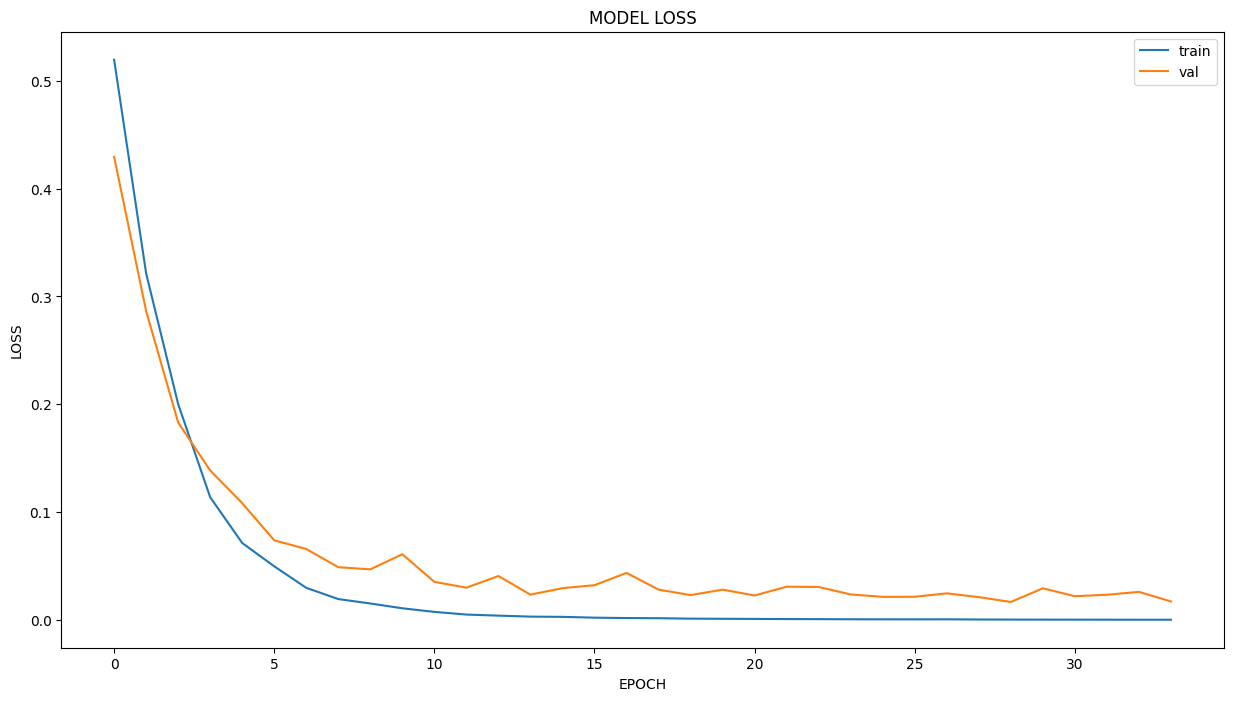

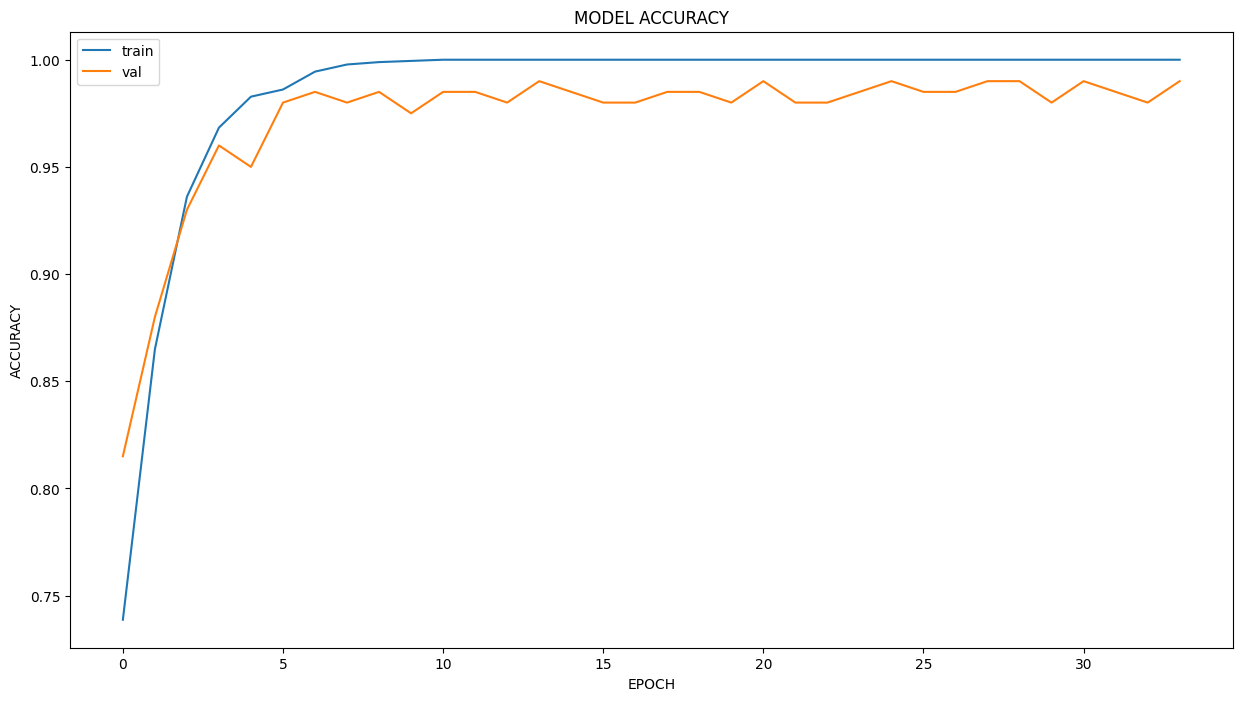

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.title('MODEL LOSS')
plt.legend(['train', 'val'])
plt.show()

plt.figure(figsize=(15,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')
plt.title('MODEL ACCURACY')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
ypred = model.predict(X_val_scaled)

7/7 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, recall_score

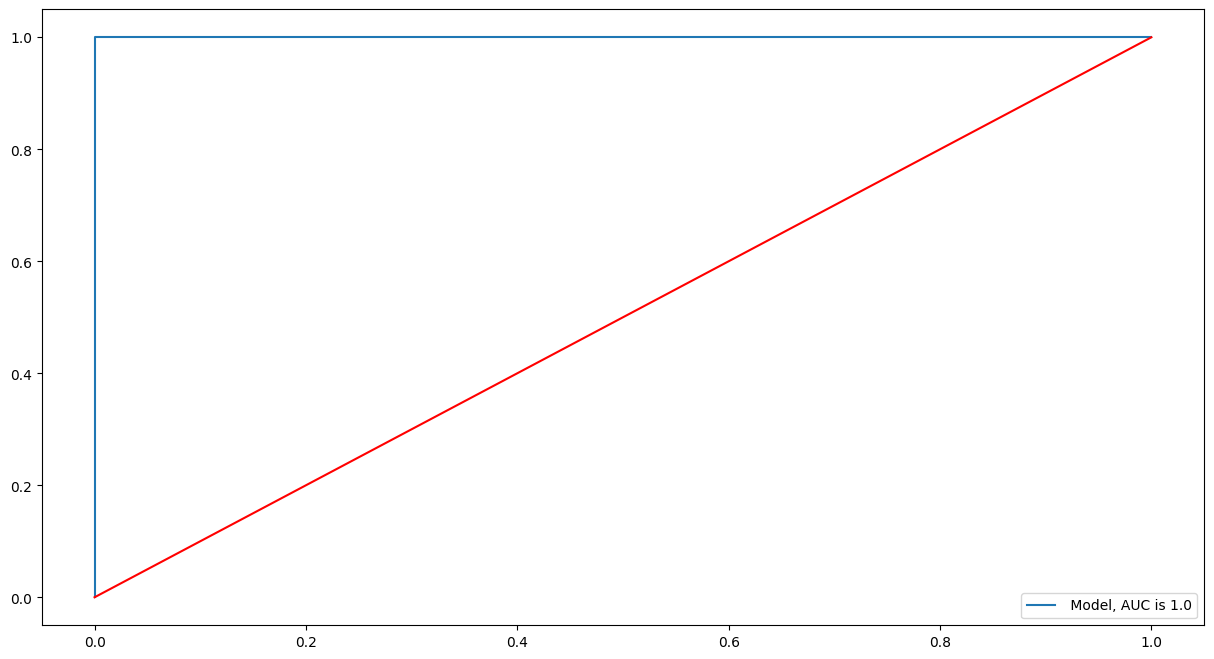

In [ ]:
plt.figure(figsize=(15,8))
f, t, _ = roc_curve(y_val,  ypred)
AUC_score = roc_auc_score(y_val, ypred)
plt.plot(f,t,label=" Model, AUC is "+str(AUC_score))
plt.plot([0, 1], [0, 1], color="red")
plt.legend(loc=4)
plt.show()

In [ ]:
ypred[ypred>=0.5] = 1
ypred[ypred<0.5] = 0

In [ ]:
print(classification_report(y_val,ypred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       102
         1.0       1.00      0.98      0.99        98

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



Testing Accuracy =  99.0


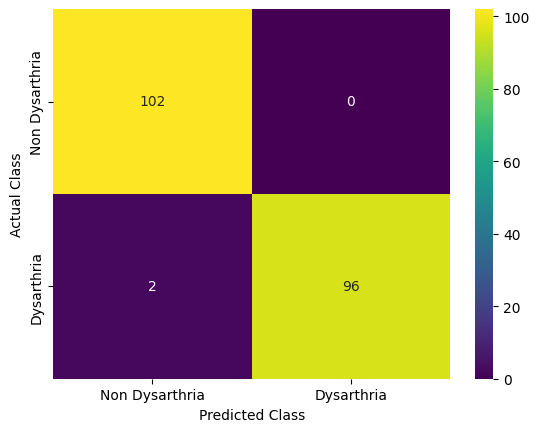

In [ ]:
import seaborn as sns
print("Testing Accuracy = ",accuracy_score(y_val,ypred)*100)
sns.heatmap(confusion_matrix(y_val, ypred),cmap='viridis',annot=True,fmt='.3g',
            xticklabels=['Non Dysarthria','Dysarthria'],yticklabels=['Non Dysarthria','Dysarthria'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()